In [7]:
import pandas as pd
import altair as alt

In [5]:
data = pd.read_csv('Amazon Sales data.csv')
data.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [12]:
data.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [13]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

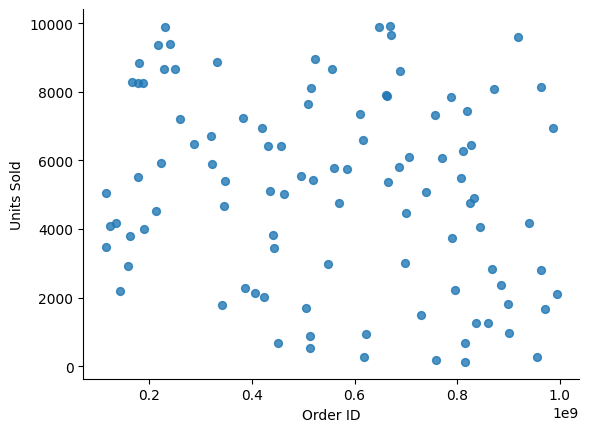

In [7]:
# @title Order ID vs Units Sold

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Order ID', y='Units Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

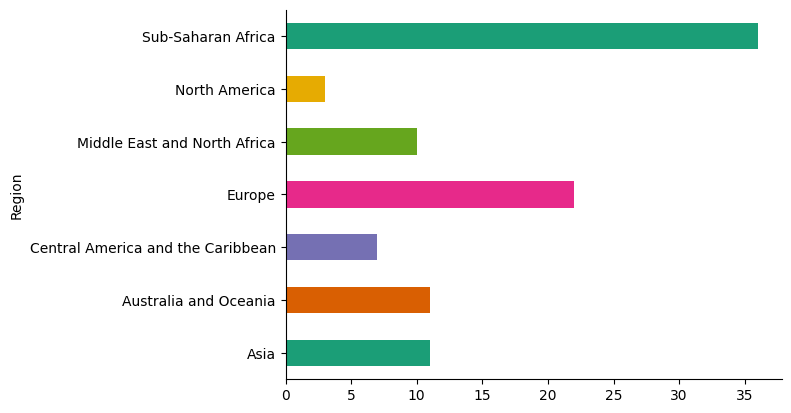

In [6]:
# @title Region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

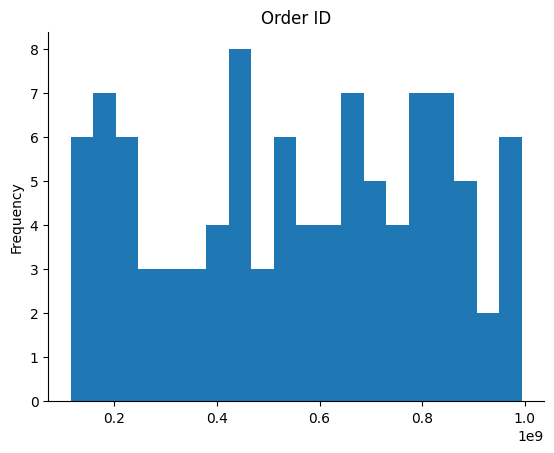

In [11]:
# @title Order ID

from matplotlib import pyplot as plt
data['Order ID'].plot(kind='hist', bins=20, title='Order ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# @title Selection Chart

brush = alt.selection_interval()

chart = alt.Chart(data).transform_calculate(
    item_type_other="if(datum['Item Type'] in ['Meat', 'Beverages', 'Baby Food'], datum['Item Type'], 'Other')"
).mark_point().encode(
    alt.X('Units Sold:Q', title='Units Sold'),
    alt.Y('Total Profit:Q', title='Total Profit'),
    color=alt.condition(brush, 'item_type_other:N', alt.value('lightgray')),
    tooltip=['Item Type', 'Units Sold', 'Total Profit']
).add_selection(
    brush
).properties(
    title='Sales and Profit by Item Type',
    width=600,
    height=400
).interactive()

chart

alt.Chart(...)